# Simple Linear Regression (Cars dataset)

This exercise demonstrates simple linear regression with the following key steps:

- **Data Loading** (Load csv from url)
- **Data Splitting** (Training and Testing Sets)
- **Simple Model Class** (Defining the Regression Model)
- **Training Loop** (Training the Model)
- **Graphing** (Visualizing training vs test losses : Seaborn)


In [1]:
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
## data import
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
# mpg = miles per galon
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


<Axes: xlabel='wt', ylabel='mpg'>

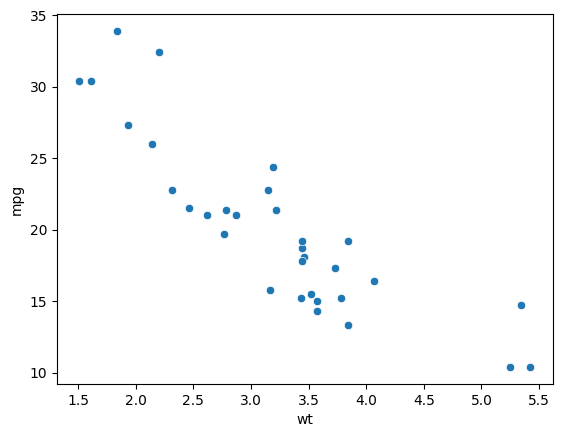

In [4]:
sns.scatterplot(x='wt', y='mpg', data=cars)

<Axes: xlabel='wt', ylabel='mpg'>

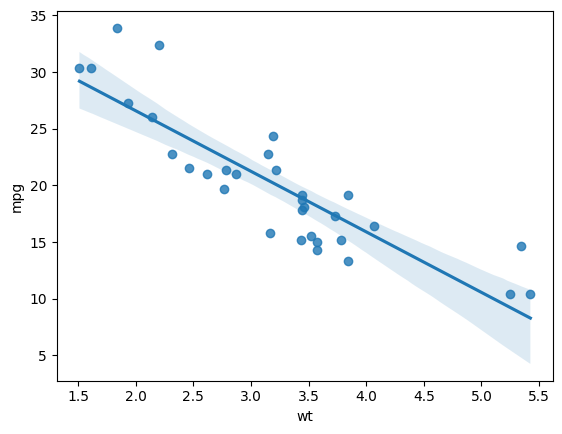

In [5]:
sns.regplot(x='wt', y='mpg', data=cars)

In [6]:
# 'X' is the feature column and 'y' is the target, we use 2 method as options
X0 = cars['wt'].values
y0 = cars.mpg.values

In [7]:
X0, y0

(array([2.62 , 2.875, 2.32 , 3.215, 3.44 , 3.46 , 3.57 , 3.19 , 3.15 ,
        3.44 , 3.44 , 4.07 , 3.73 , 3.78 , 5.25 , 5.424, 5.345, 2.2  ,
        1.615, 1.835, 2.465, 3.52 , 3.435, 3.84 , 3.845, 1.935, 2.14 ,
        1.513, 3.17 , 2.77 , 3.57 , 2.78 ]),
 array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
        16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
        15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4]))

In [8]:
X = torch.tensor(X0, dtype=torch.float32).reshape(-1,1)
y = torch.tensor(y0, dtype=torch.float32).reshape(-1,1)

In [9]:
X, y

(tensor([[2.6200],
         [2.8750],
         [2.3200],
         [3.2150],
         [3.4400],
         [3.4600],
         [3.5700],
         [3.1900],
         [3.1500],
         [3.4400],
         [3.4400],
         [4.0700],
         [3.7300],
         [3.7800],
         [5.2500],
         [5.4240],
         [5.3450],
         [2.2000],
         [1.6150],
         [1.8350],
         [2.4650],
         [3.5200],
         [3.4350],
         [3.8400],
         [3.8450],
         [1.9350],
         [2.1400],
         [1.5130],
         [3.1700],
         [2.7700],
         [3.5700],
         [2.7800]]),
 tensor([[21.0000],
         [21.0000],
         [22.8000],
         [21.4000],
         [18.7000],
         [18.1000],
         [14.3000],
         [24.4000],
         [22.8000],
         [19.2000],
         [17.8000],
         [16.4000],
         [17.3000],
         [15.2000],
         [10.4000],
         [10.4000],
         [14.7000],
         [32.4000],
         [30.4000],
         [

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
len(x_train), len(x_test)

(25, 7)

In [12]:
x_train.shape

torch.Size([25, 1])

In [13]:
y_test

tensor([[19.7000],
        [10.4000],
        [19.2000],
        [32.4000],
        [22.8000],
        [19.2000],
        [15.0000]])

In [14]:
# TODO: Plot train and test

In [15]:
class IrisClassification(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(1, 1)

    def forward(self, x):
        preds = self.layer1(x)
        return preds

In [16]:
model = IrisClassification()
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.078)

In [17]:
model.state_dict()

OrderedDict([('layer1.weight', tensor([[-0.2617]])),
             ('layer1.bias', tensor([0.9529]))])

In [18]:
train_losses, test_losses = [], []
num_epochs = 600

for epoch in range(num_epochs):
    model.train()

    # Forward pass
    y_pred = model(x_train)

    # Calculate loss
    loss = loss_fn(y_pred, y_train)
    train_losses.append(loss.item())

    # Optimizer zero gradient
    optimizer.zero_grad()
    
    # Backward pass
    loss.backward()
        
    # Optimizer step
    optimizer.step()
    
    # TESTING
    model.eval()
    with torch.inference_mode():
        y_pred_test = model(x_test)
        loss_test = loss_fn(y_pred_test, y_test)
        test_losses.append(loss_test.item())
    if epoch % 5 == 0:
        print(f'Epoch: [{epoch+1}/{num_epochs}], loss: {loss.item():.4f}')

Epoch: [1/600], loss: 432.8264
Epoch: [6/600], loss: 145.3839
Epoch: [11/600], loss: 93.9874
Epoch: [16/600], loss: 78.7493
Epoch: [21/600], loss: 69.7730
Epoch: [26/600], loss: 62.5033
Epoch: [31/600], loss: 56.1722
Epoch: [36/600], loss: 50.5863
Epoch: [41/600], loss: 45.6471
Epoch: [46/600], loss: 41.2780
Epoch: [51/600], loss: 37.4129
Epoch: [56/600], loss: 33.9938
Epoch: [61/600], loss: 30.9690
Epoch: [66/600], loss: 28.2932
Epoch: [71/600], loss: 25.9261
Epoch: [76/600], loss: 23.8320
Epoch: [81/600], loss: 21.9795
Epoch: [86/600], loss: 20.3408
Epoch: [91/600], loss: 18.8910
Epoch: [96/600], loss: 17.6085
Epoch: [101/600], loss: 16.4740
Epoch: [106/600], loss: 15.4703
Epoch: [111/600], loss: 14.5824
Epoch: [116/600], loss: 13.7970
Epoch: [121/600], loss: 13.1021
Epoch: [126/600], loss: 12.4875
Epoch: [131/600], loss: 11.9437
Epoch: [136/600], loss: 11.4626
Epoch: [141/600], loss: 11.0371
Epoch: [146/600], loss: 10.6606
Epoch: [151/600], loss: 10.3276
Epoch: [156/600], loss: 10.0

<Axes: >

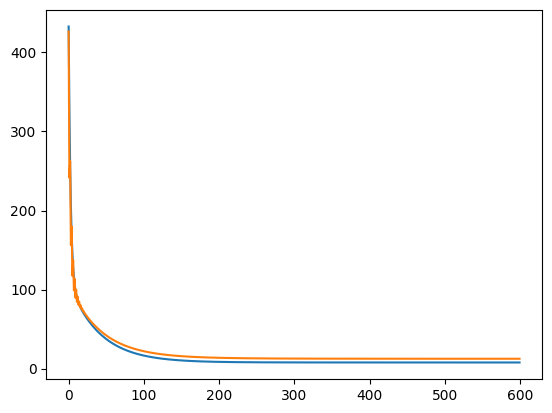

In [19]:
# Plot Train losses vs test losses Seaborn version
sns.lineplot(x=range(num_epochs), y=train_losses)
sns.lineplot(x=range(num_epochs), y=test_losses)


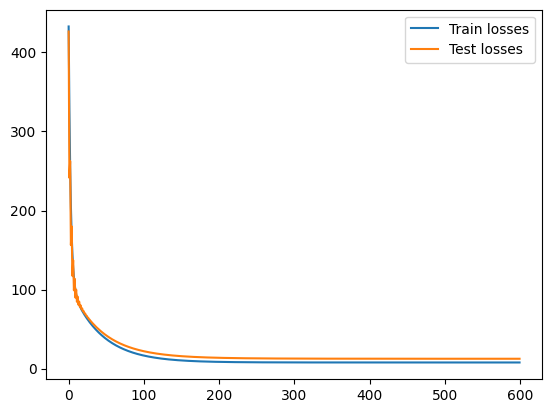

In [20]:
# Plot Train losses vs test losses Matplotlib version
plt.plot(range(num_epochs), train_losses, label='Train losses')
plt.plot(range(num_epochs), test_losses, label='Test losses')
plt.legend()